# Linear Regression

## Using sklearn

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:

X = load_boston()
X_df = pd.DataFrame(X.data,columns=X.feature_names) 
Y_df = pd.DataFrame(X.target,columns=['price']) 
print(X_df.head(5))
print(Y_df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2


In [10]:
X = load_boston()
X_df = pd.DataFrame(X.data,columns=X.feature_names)
Y_df = pd.DataFrame(X.target,columns=['price']) 
print(X_df.head(5))
print(Y_df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size = 0.3, random_state = 5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(354, 13) (152, 13) (354, 1) (152, 1)


In [17]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[[-1.26415881  0.94329906 -0.16687636  0.18653568 -1.49252028  2.79557313
  -0.29648219 -2.72594888  2.76899352 -2.1378414  -2.09193889  1.16450017
  -3.29650834]] [22.55621469]


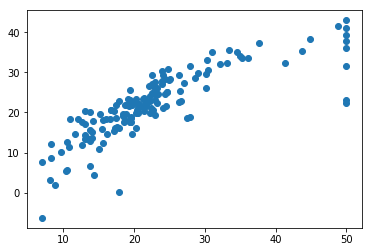

In [18]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
print(reg.coef_, reg.intercept_)


Y_pred = reg.predict(X_test)
plt.scatter(Y_test,Y_pred)
plt.show()

## Linear Regression using Normal equation method

[[-1.264158809805422], [0.9432990570721635], [-0.1668763557883306], [0.18653568013076904], [-1.4925202816478027], [2.7955731334373737], [-0.2964821943408644], [-2.725948876939615], [2.7689935182856313], [-2.1378413995368994], [-2.0919388928971037], [1.1645001660708405], [-3.296508344103832], [22.556214689265538]]


Text(0,0.5,'Predicted Price')

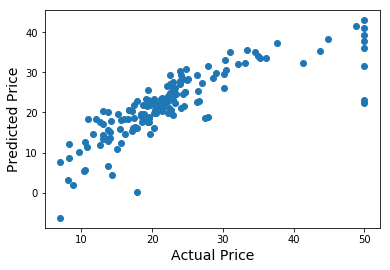

In [19]:
def fnLinearRegression_NormalEquation(X, Y):
    X_transpose = np.transpose(X)
    X_covariance = np.dot(X_transpose, X)
    X_covariance_inv = np.linalg.inv(X_covariance)
    Y_covarinace = np.dot(np.transpose(X), Y)
    Coeff = np.dot(X_covariance_inv, Y_covarinace)
    return Coeff


X_train_NE = np.c_[X_train,np.ones(X_train.shape[0])]
X_test_NE = np.c_[X_test,np.ones(X_test.shape[0])]

Coeff = fnLinearRegression_NormalEquation(X_train_NE, Y_train)
lst = Coeff.tolist()
print(lst)
Y_pred = np.dot(X_test_NE,Coeff)
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price",size=14)
plt.ylabel("Predicted Price",size=14)